In [2]:
#수정수정

# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 딥러닝 라이브러리
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
print(tf.__version__)

2.17.0-rc1


In [3]:
import pandas as pd
import numpy as np

# 훈련 데이터 파일 경로
training_file = '/Users/doheonkim/Desktop/dataset/chungnam_training.xlsx'

# 엑셀 파일 로드
training_data = pd.read_excel(training_file)

# 사용할 열 지정
ecg_columns = ['ECG_I', 'ECG_II', 'ECG_III', 'ECG_aVL', 'ECG_aVR', 'ECG_aVF', 'ECG_V1', 'ECG_V2', 'ECG_V3', 'ECG_V4', 'ECG_V5', 'ECG_V6']
# 각 셀의 데이터를 콤마로 구분하여 배열로 변환하고 결합
X_train = np.array([np.concatenate([np.fromstring(row[col], sep=',')[np.newaxis, :] for col in ecg_columns], axis=0) for _, row in training_data.iterrows()])

print("X_train shape:", X_train.shape)  


y_train = training_data['LVEF'].values


print("y_train shape:", y_train.shape)  

X_train shape: (467, 12, 249)
y_train shape: (467,)


In [4]:
import pandas as pd
import numpy as np

# 훈련 데이터 파일 경로
tuning_file = '/Users/doheonkim/Desktop/dataset/chungnam_tuning.xlsx'

# 엑셀 파일 로드
tuning_data = pd.read_excel(tuning_file)

# 사용할 열 지정
ecg_columns = ['ECG_I', 'ECG_II', 'ECG_III', 'ECG_aVL', 'ECG_aVR', 'ECG_aVF', 'ECG_V1', 'ECG_V2', 'ECG_V3', 'ECG_V4', 'ECG_V5', 'ECG_V6']
# 각 셀의 데이터를 콤마로 구분하여 배열로 변환하고 결합
X_tuning = np.array([np.concatenate([np.fromstring(row[col], sep=',')[np.newaxis, :] for col in ecg_columns], axis=0) for _, row in tuning_data.iterrows()])

print("X_tuning shape:", X_tuning.shape)  

y_tuning = tuning_data['LVEF'].values


print("y_tuning shape:", y_tuning.shape)  

X_tuning shape: (156, 12, 249)
y_tuning shape: (156,)


In [5]:
import pandas as pd
import numpy as np

# 훈련 데이터 파일 경로
internal_validation_file = '/Users/doheonkim/Desktop/dataset/chungnam_internal_validation.xlsx'

# 엑셀 파일 로드
internal_validation_data = pd.read_excel(internal_validation_file)

# 사용할 열 지정
ecg_columns = ['ECG_I', 'ECG_II', 'ECG_III', 'ECG_aVL', 'ECG_aVR', 'ECG_aVF', 'ECG_V1', 'ECG_V2', 'ECG_V3', 'ECG_V4', 'ECG_V5', 'ECG_V6']
# 각 셀의 데이터를 콤마로 구분하여 배열로 변환하고 결합
X_internal_validation = np.array([np.concatenate([np.fromstring(row[col], sep=',')[np.newaxis, :] for col in ecg_columns], axis=0) for _, row in internal_validation_data.iterrows()])

print("X_internal_validation shape:", X_internal_validation.shape)  

y_internal_validation = internal_validation_data['LVEF'].values

print("y_internal_validation shape:", y_internal_validation.shape)  

X_internal_validation shape: (155, 12, 249)
y_internal_validation shape: (155,)


In [6]:
X_train = X_train.transpose(0, 2, 1)
X_tuning = X_tuning.transpose(0, 2, 1)
X_internal_validation = X_internal_validation.transpose(0, 2, 1)
print(X_train.shape)




(467, 249, 12)


In [7]:
from sktime.regression.deep_learning.cnn import CNNRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


estimator = CNNRegressor()

#https://www.sktime.net/en/stable/api_reference/auto_generated/sktime.regression.deep_learning.CNNRegressor.html
#참고
estimator.fit(X_train, y_train)
y_predict = estimator.predict(X_tuning)
print('Regression score:', estimator.score(X_tuning, y_tuning))


# MAE와 MSE 계산
mae = mean_absolute_error(y_tuning, y_predict)
mse = mean_squared_error(y_tuning, y_predict)

# MAE와 MSE 출력
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Regression score: -1.899782419204712
MAE (Mean Absolute Error): 19.5326308287107
MSE (Mean Squared Error): 588.5253089757867


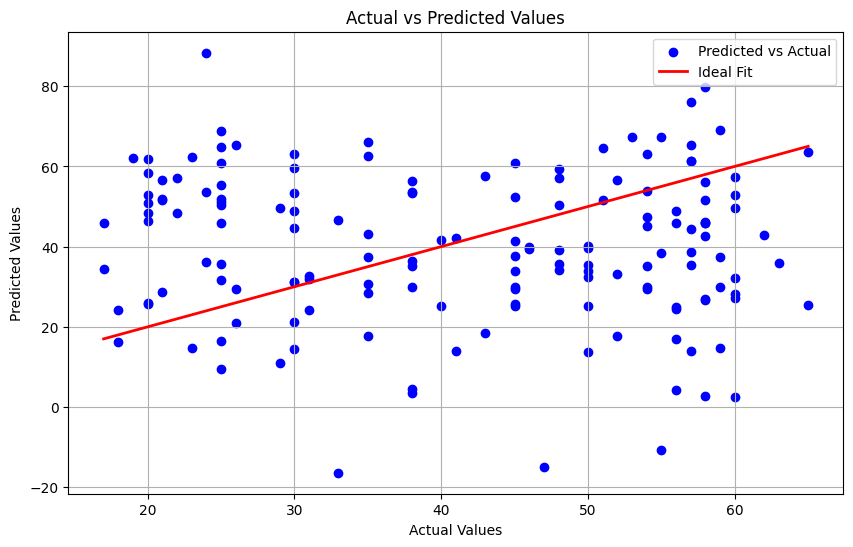

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_tuning, y_predict, color='blue', label='Predicted vs Actual')
plt.plot([min(y_tuning), max(y_tuning)], [min(y_tuning), max(y_tuning)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()